## Instalando e Carregando os Pacotes

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import preprocessing

## Tarefa 1 - Single Output Regression Analysis

### Carregando os Dados

In [2]:
# Carrega os dados
dados = pd.read_csv(r"dados/tiendas.csv", sep= ";")

In [3]:
dados["TRAN_START_DT"] = pd.to_datetime(dados["TRAN_START_DT"], format = '%Y-%m-%d')
dados["suma_venta_q"] = pd.to_numeric(dados["suma_venta_q"])
dados["recep_devol"] = pd.to_numeric(dados["recep_devol"])
dados["stock"] = pd.to_numeric(dados["stock"])
dados["suma_merma_q"] = pd.to_numeric(dados["suma_merma_q"])
dados.head()

,LOCATION_ID,ITEM_HIERARCHY_LEVEL_4_CD,ITEM_HIERARCHY_LEVEL_4_DESC,TRAN_START_DT,suma_venta_q,suma_venta_$,suma_merma_q,suma_merma_$,recep_devol,Cons_Casino,stock,dias_mes,ventas_p_dia,dias_cob_stock
0,J502,50102003,SOBRECOSTILLA,2021-12-31,4524,44868207,-3,-14189,2246,0,1934.25,31,145.935484,62.395161
1,J502,50103002,POSTA ROSADA,2021-12-31,4544,44603617,-3,-14189,2246,0,577.22,31,146.580645,18.620000
2,J502,50105003,PALANCA USA,2021-12-31,4527,44198926,-3,-14189,2127,0,158.52,31,146.032258,5.113548
3,J502,50106005,PALANCA,2021-12-31,4489,44218694,-3,-14189,2127,0,383.15,31,144.806452,12.359677
4,J502,50106019,POLLO GANSO,2021-12-31,4542,44507912,-2,-8933,2127,0,1409.75,31,146.516129,45.475806


In [4]:
dados["sum_stock_recep"] = dados["recep_devol"] + dados["stock"]
dados["mermas_pos"] = dados["suma_merma_q"] * -1
dados.head()

,LOCATION_ID,ITEM_HIERARCHY_LEVEL_4_CD,ITEM_HIERARCHY_LEVEL_4_DESC,TRAN_START_DT,suma_venta_q,suma_venta_$,suma_merma_q,suma_merma_$,recep_devol,Cons_Casino,stock,dias_mes,ventas_p_dia,dias_cob_stock,sum_stock_recep,mermas_pos
0,J502,50102003,SOBRECOSTILLA,2021-12-31,4524,44868207,-3,-14189,2246,0,1934.25,31,145.935484,62.395161,4180.25,3
1,J502,50103002,POSTA ROSADA,2021-12-31,4544,44603617,-3,-14189,2246,0,577.22,31,146.580645,18.620000,2823.22,3
2,J502,50105003,PALANCA USA,2021-12-31,4527,44198926,-3,-14189,2127,0,158.52,31,146.032258,5.113548,2285.52,3
3,J502,50106005,PALANCA,2021-12-31,4489,44218694,-3,-14189,2127,0,383.15,31,144.806452,12.359677,2510.15,3
4,J502,50106019,POLLO GANSO,2021-12-31,4542,44507912,-2,-8933,2127,0,1409.75,31,146.516129,45.475806,3536.75,2


### Pré-Processamento dos Dados

In [5]:
# Extraindo a variável ano (variável de entrada)
array_ano = dados["sum_stock_recep"].values.reshape(-1,1)

In [6]:
array_ano

array([[4180.25],
       [2823.22],
       [2285.52],
       [2510.15],
       [3536.75],
       [2420.85],
       [2395.58],
       [4175.45],
       [2340.46],
       [2636.15],
       [1935.15],
       [2558.02],
       [2793.21],
       [2046.64],
       [1207.36],
       [2451.32],
       [1990.38],
       [1030.82],
       [1596.19],
       [1945.29],
       [ 508.44],
       [1260.23],
       [1363.21],
       [ 330.76],
       [ 681.32],
       [ 400.54],
       [ 379.36],
       [ 123.08],
       [2331.28],
       [ 705.83],
       [1330.27],
       [2116.39],
       [1362.8 ],
       [1104.39],
       [ 874.09],
       [1398.41],
       [1057.62],
       [2002.74],
       [1811.59],
       [1206.01],
       [1100.99],
       [1955.61],
       [1998.33],
       [1392.72],
       [1697.08],
       [1749.81],
       [1589.8 ],
       [2754.29],
       [  57.34],
       [1369.88],
       [ 509.48],
       [ 808.43],
       [ 690.82],
       [ 856.8 ],
       [1272.38],
       [10

In [7]:
type(array_ano)

numpy.ndarray

In [8]:
# Valores máximo e mínimo
max_f = max(array_ano)
min_f = min(array_ano)
print(max_f)
print(min_f)

[9211.92]
[33.68]


In [9]:
# Pré-processamento (normalização)
norm_features = preprocessing.minmax_scale(array_ano)
print(array_ano)

[[4180.25]
 [2823.22]
 [2285.52]
 [2510.15]
 [3536.75]
 [2420.85]
 [2395.58]
 [4175.45]
 [2340.46]
 [2636.15]
 [1935.15]
 [2558.02]
 [2793.21]
 [2046.64]
 [1207.36]
 [2451.32]
 [1990.38]
 [1030.82]
 [1596.19]
 [1945.29]
 [ 508.44]
 [1260.23]
 [1363.21]
 [ 330.76]
 [ 681.32]
 [ 400.54]
 [ 379.36]
 [ 123.08]
 [2331.28]
 [ 705.83]
 [1330.27]
 [2116.39]
 [1362.8 ]
 [1104.39]
 [ 874.09]
 [1398.41]
 [1057.62]
 [2002.74]
 [1811.59]
 [1206.01]
 [1100.99]
 [1955.61]
 [1998.33]
 [1392.72]
 [1697.08]
 [1749.81]
 [1589.8 ]
 [2754.29]
 [  57.34]
 [1369.88]
 [ 509.48]
 [ 808.43]
 [ 690.82]
 [ 856.8 ]
 [1272.38]
 [1060.21]
 [ 858.24]
 [1071.56]
 [1105.32]
 [2354.08]
 [1656.3 ]
 [1698.24]
 [1873.68]
 [2504.81]
 [2362.  ]
 [3262.42]
 [2602.78]
 [2545.63]
 [3083.4 ]
 [2701.14]
 [3254.17]
 [3360.87]
 [3092.33]
 [2520.7 ]
 [1860.87]
 [2266.67]
 [3329.65]
 [1874.92]
 [3141.5 ]
 [2228.74]
 [2296.23]
 [2274.3 ]
 [2802.17]
 [3034.35]
 [3080.89]
 [3082.66]
 [2841.36]
 [3081.08]
 [3662.4 ]
 [5918.2 ]
 [6557.58]

In [10]:
# Variável de saída
label = dados["suma_venta_q"]

In [11]:
# Visualiza
label

0      4524
1      4544
2      4527
3      4489
4      4542
       ... 
474    2114
475    2006
476    2197
477    2332
478    2301
Name: suma_venta_q, Length: 479, dtype: int64

In [12]:
# Valores máximo e mínimo (normalizando os dados para não estourar a memória do computador)
max_l = max(label)
min_l = min(label)
print(max_l)
print(min_l)

7888
781


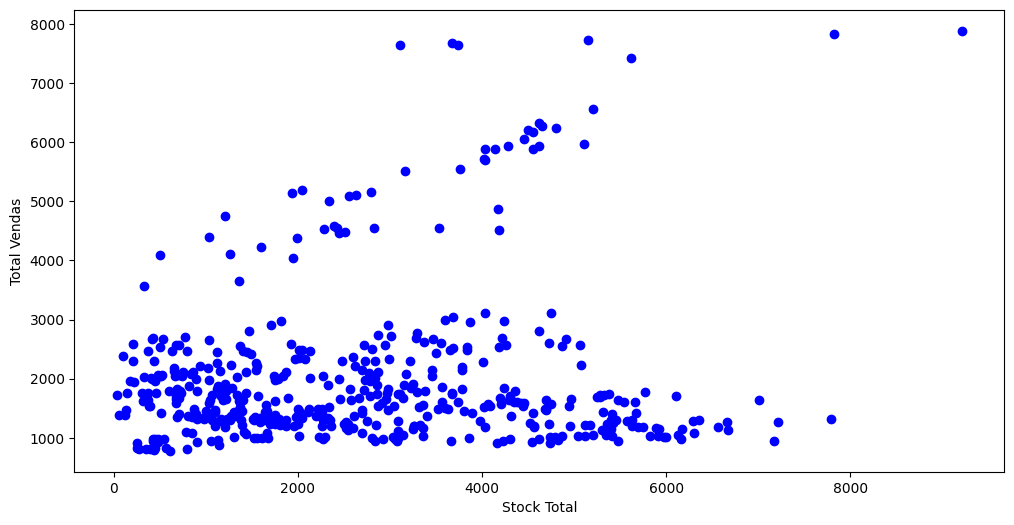

In [13]:
# Plot
plt.figure(figsize = (12, 6))
plt.scatter(dados['sum_stock_recep'], dados['suma_venta_q'], c = 'blue')
plt.ylabel("Total Vendas")
plt.xlabel("Stock Total")
plt.show()

In [14]:
# Normaliza o label
norm_label = preprocessing.minmax_scale(label)
print(norm_label)

[0.52666385 0.52947798 0.52708597 0.52173913 0.52919657 0.53144787
 0.5344027  0.57478542 0.5942029  0.60827353 0.61333896 0.60700718
 0.61699733 0.62135922 0.55790066 0.51836218 0.50654285 0.50949768
 0.48599972 0.45842127 0.46686366 0.46798931 0.40509357 0.39243
 0.11284649 0.10749965 0.10749965 0.08442381 0.07893626 0.08780076
 0.08189109 0.09821303 0.09638385 0.0975095  0.09933868 0.09342901
 0.08104686 0.08611228 0.06120726 0.05670466 0.0576896  0.05937808
 0.06289574 0.06191079 0.06261432 0.06416209 0.06767975 0.06993105
 0.08498663 0.10299705 0.09047418 0.08231321 0.0797805  0.08118756
 0.08372028 0.08160968 0.0820318  0.07387083 0.06711693 0.07373013
 0.08329816 0.07485578 0.07401154 0.06303644 0.0598002  0.05895596
 0.05473477 0.04854369 0.04643309 0.04193049 0.05135782 0.05332771
 0.07049388 0.06725763 0.06345856 0.05811172 0.06177009 0.0598002
 0.03644294 0.03376952 0.03264387 0.02800056 0.03025186 0.03362882
 0.02363867 0.03053328 0.02406079 0.0244829  0.02349796 0.05290559

In [15]:
# Divide os dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(norm_features, 
                                                        norm_label, 
                                                        test_size = 0.075,
                                                        random_state = 3)

### Modelo Single Output Regression

In [16]:
# Cria o modelo de regressão linear com single output
modelo_single_output = linear_model.LinearRegression()

In [17]:
# Treinamento
modelo_single_output.fit(x_treino, y_treino)

LinearRegression()

In [18]:
# Lista de anos para as previsões
anos = [50, 100,300, 500,1000,2000,2500,3000,5000,7000,9000]

50
[0.13207372]
[1719.64793723]
100
[0.13283508]
[1725.05894738]
300
[0.13588054]
[1746.70298798]
500
[0.13892599]
[1768.34702858]
1000
[0.14653963]
[1822.45713008]
2000
[0.1617669]
[1930.67733307]
2500
[0.16938053]
[1984.78743456]
3000
[0.17699417]
[2038.89753606]
5000
[0.2074487]
[2255.33794204]
7000
[0.23790324]
[2471.77834803]
9000
[0.26835778]
[2688.21875401]


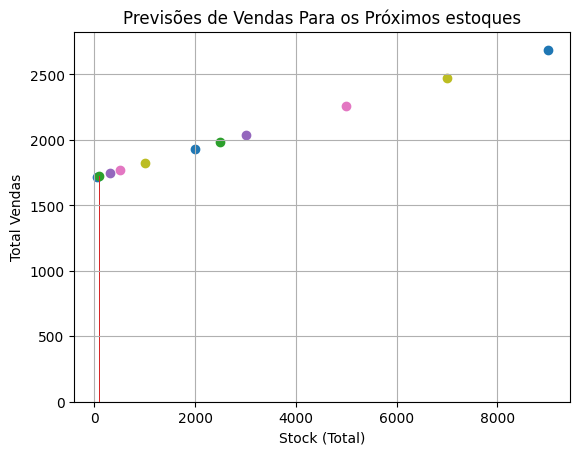

In [19]:
# Loop com as previsões
for i in anos:
    
    x = i
    print(x)
    
    # Normaliza os dados
    scaled_x = float((x - min_f) / (max_f - min_f))
    
    # Extrai o coeficiente do valor previsto
    coef = modelo_single_output.predict([[scaled_x]])
    print(coef)
    
    # Calcula a previsão desfazendo a normalização
    pred = coef * (max_l - min_l) + min_l
    y = pred
    print(y)
    
    # Plot
    plt.scatter(x, y)
    plt.bar(x, pred)
    plt.ylabel('Total Vendas')
    plt.xlabel('Stock (Total)')
    plt.grid(True)
    plt.title('Previsões de Vendas Para os Próximos estoques')

In [20]:
# Extrai as previsões do modelo
y_pred = modelo_single_output.predict(x_teste)

In [21]:
# Calcula a performance do modelo
df = pd.DataFrame({'Total Vendas Real':y_teste, 'Total Vendas Previsão':y_pred})
print("Valor Real x Valor Previsto:\n\n", df)

Valor Real x Valor Previsto:

     Total Vendas Real  Total Vendas Previsão
0            0.084424               0.133187
1            0.223442               0.170828
2            0.048544               0.170075
3            0.003096               0.135508
4            0.718165               0.200663
5            0.082313               0.143623
6            0.140847               0.219118
7            0.114394               0.199172
8            0.670184               0.188519
9            0.035599               0.213751
10           0.177149               0.142589
11           0.182918               0.144163
12           0.049951               0.212008
13           0.131560               0.151778
14           0.022372               0.147413
15           0.172928               0.163709
16           0.023920               0.214684
17           0.156184               0.179245
18           0.251864               0.196119
19           0.966230               0.178735
20           0.269312   

In [22]:
# Score
score = modelo_single_output.score(x_teste, y_teste)

In [23]:
print("Precisão do Modelo:",(score * 100))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred)))

Precisão do Modelo: 0.8261206544071142
Mean Absolute Error: 0.15535952156077595
Mean Squared Error: 0.05701384641319902
Root Mean Squared Error: 0.23877572408684894


# Fim